# **Assignment 9**

In [4]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Machine learning libraries
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts


#plotly or other graphing library

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


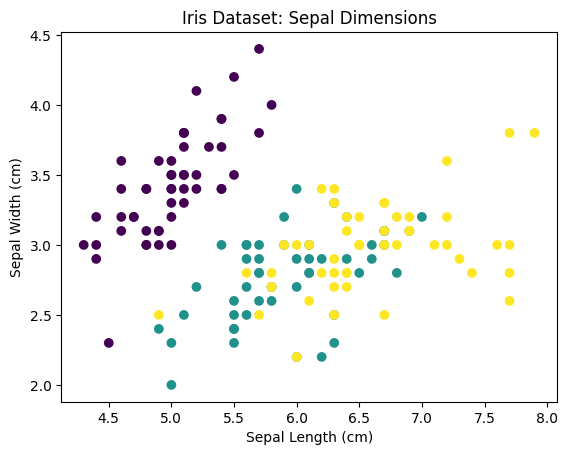

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [6]:
# Core libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Machine learning libraries
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

# Load datasets
iris = ds.load_iris()  # Load the Iris dataset
#boston = ds.load_boston()  # Load the Boston housing dataset (if needed)

# Convert Iris dataset to a DataFrame for analysis
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# Preview the dataset
print(iris_df.head())

# Visualization with matplotlib (Example: Sepal length vs Sepal width)
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Dimensions')
plt.show()

# Example: Splitting the dataset for a machine learning task
X = iris['data']  # Features
y = iris['target']  # Target labels
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Example: K-Nearest Neighbors Classifier
knn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
predictions = knn.predict(X_test)
print("Predictions:", predictions)


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [7]:
# Convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Create a list of target names
target_names = list(iris.target_names)

# Print the result for Q1
print("First 5 rows of the dataset:")
print(iris_df.head())
print("\nTarget names:", target_names)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Target names: ['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def predict_knn(new_observations):
    from sklearn.datasets import load_iris
    iris = load_iris()

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(iris.data, iris.target)
    predictions = knn.predict(new_observations)
    return [iris.target_names[pred] for pred in predictions]

# Example: Predict for new observations
new_observations = [[5.1, 3.5, 1.4, 0.2], [6.5, 3.0, 5.5, 2.0]]
predictions = predict_knn(new_observations)
print("\nPredictions for new observations:", predictions)




Predictions for new observations: ['setosa', 'virginica']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

def knn_accuracy(split=0.2, neighbors=5):
    iris = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=split, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example: Calculate accuracy
accuracy = knn_accuracy(split=0.2, neighbors=5)
print("\nAccuracy score:", accuracy)




Accuracy score: 1.0


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

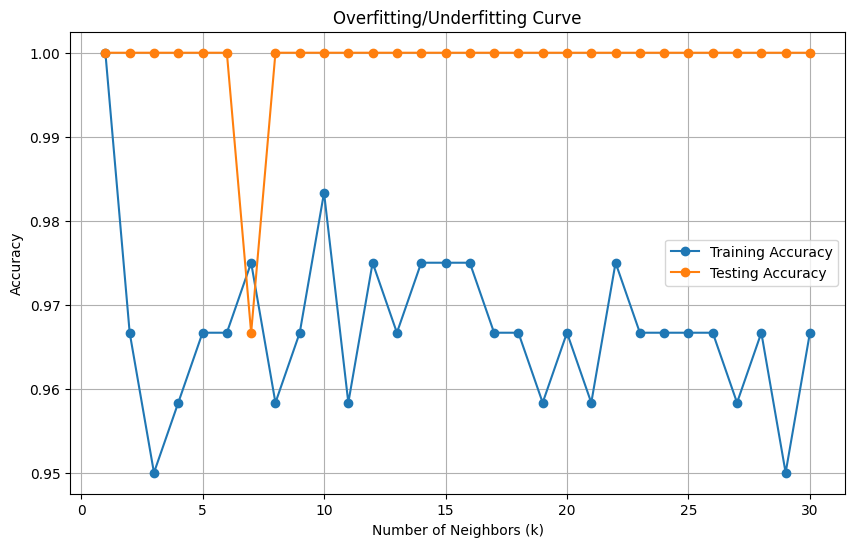

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def plot_overfitting_curve():
    iris = load_iris()
    neighbors_range = range(1, 31)
    train_scores = []
    test_scores = []

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

    for k in neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(neighbors_range, train_scores, label='Training Accuracy', marker='o')
    plt.plot(neighbors_range, test_scores, label='Testing Accuracy', marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('Overfitting/Underfitting Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Generate the plot
plot_overfitting_curve()
